In [1]:
import sys
import os

# Get the parent directory of the "notebook" folder
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Add it to the Python path
sys.path.append(project_root)

In [2]:
from strategies.moving_average import MovingAverage
from strategies.momentum import MomentumStrategy
from utils.backtest import Backtest
from utils.data_handler import DataHandler
import yfinance as yf
import pandas as pd

## Disclaimer : please ensure you have latest version of yfinance ! 

### Simple Moving Average

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


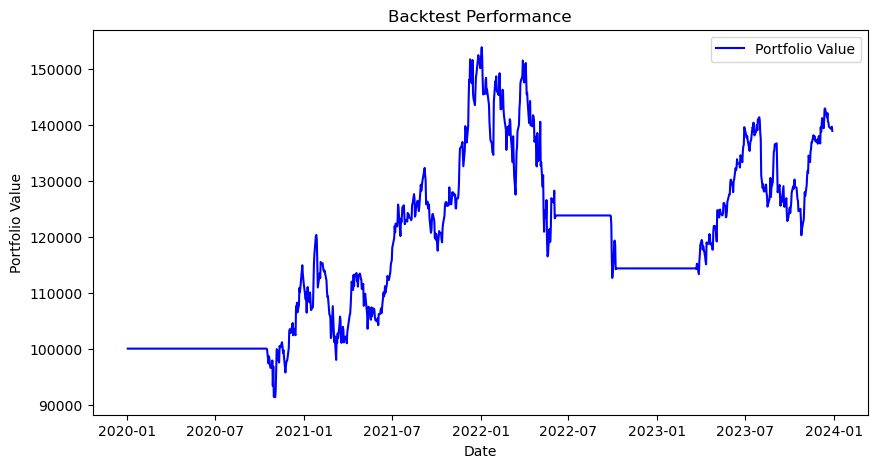

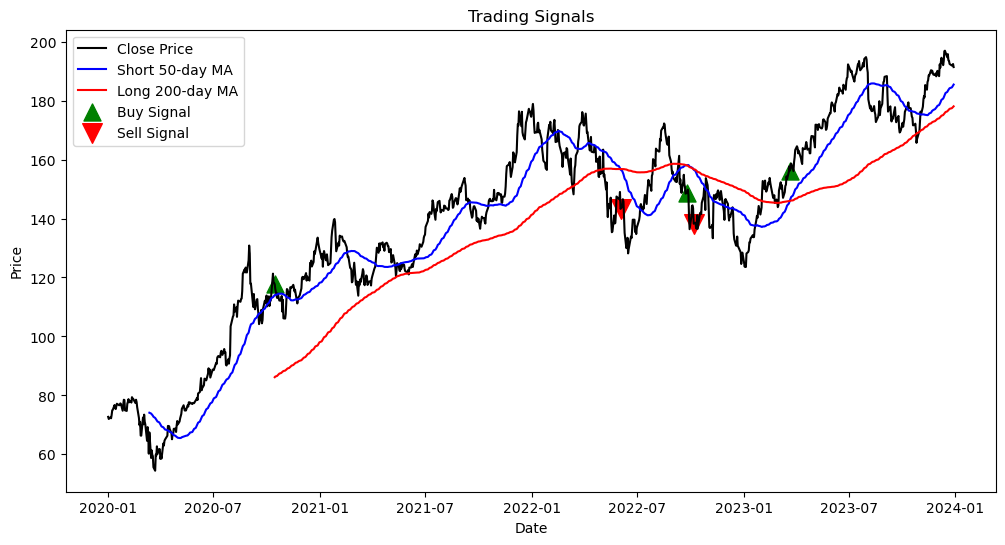

{'Final Value': 138950.37682490546, 'Return': 0.3895037682490545, 'Sharpe Ratio': 0.5022165020637386, 'Max Drawdown': -0.26811473063365365}


In [5]:
data_handler = DataHandler(ticker='AAPL', start_date='2020-01-01', end_date='2024-01-01')
data = data_handler.fetch_data()

my_strategy = MovingAverage(short_window=50, long_window=200, mode='crossover', invert_signals=False)
backtest = Backtest(data, my_strategy)
results = backtest.run()
my_strategy.plot_signals(data)
print(results)

### Simple Momemtum Strategy

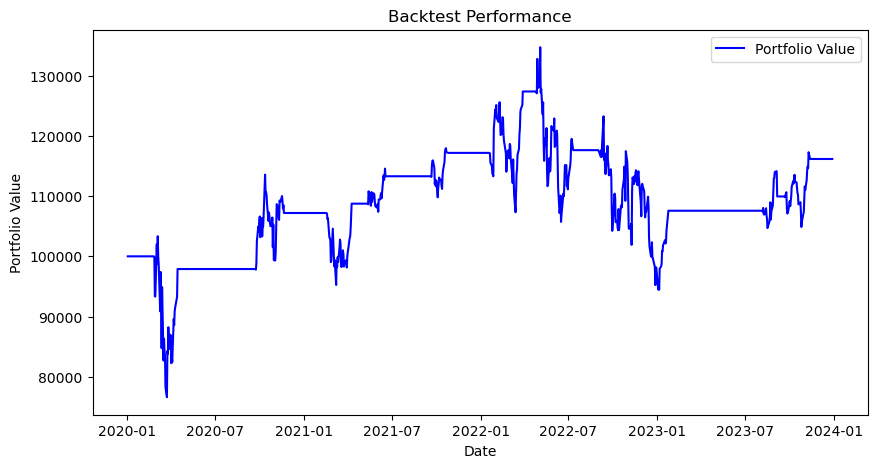

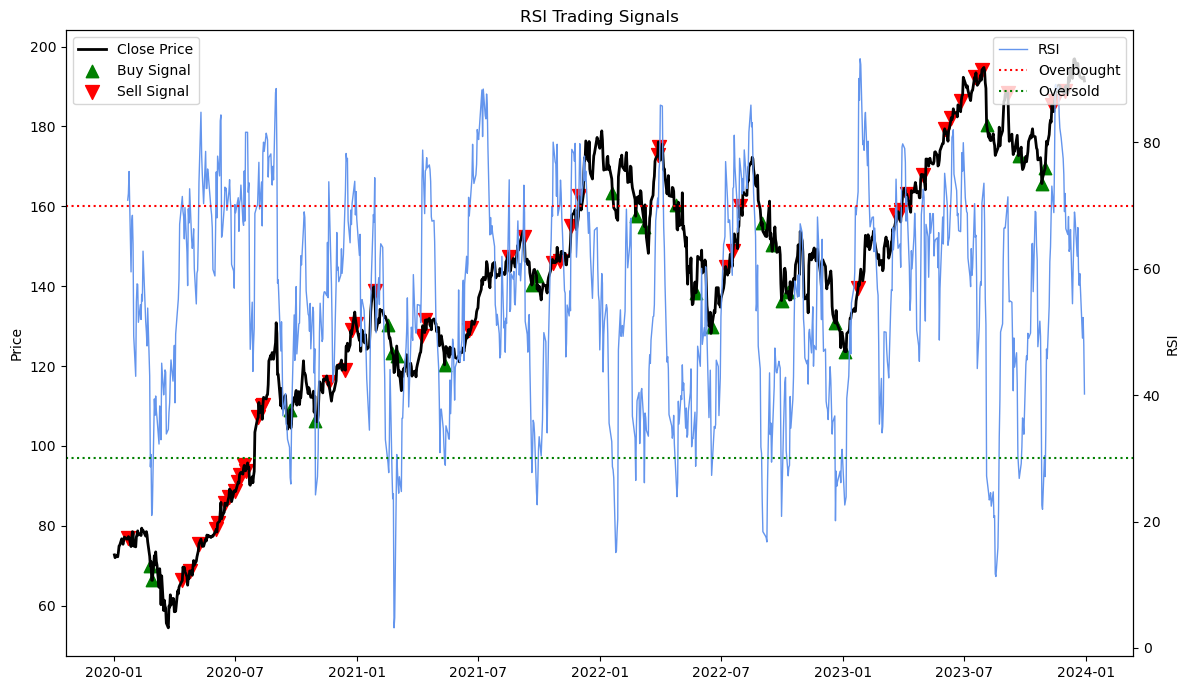

{'Final Value': 116167.69803777324, 'Return': 0.16167698037773248, 'Sharpe Ratio': 0.2743175591809714, 'Max Drawdown': -0.2989018817635387}


In [7]:


my_momemtum = MomentumStrategy(period=14, overbought=70, oversold=30)
backtest = Backtest(data, my_momemtum)
results = backtest.run()
my_momemtum.plot_signals(data)
print(results)

[*********************100%***********************]  1 of 1 completed


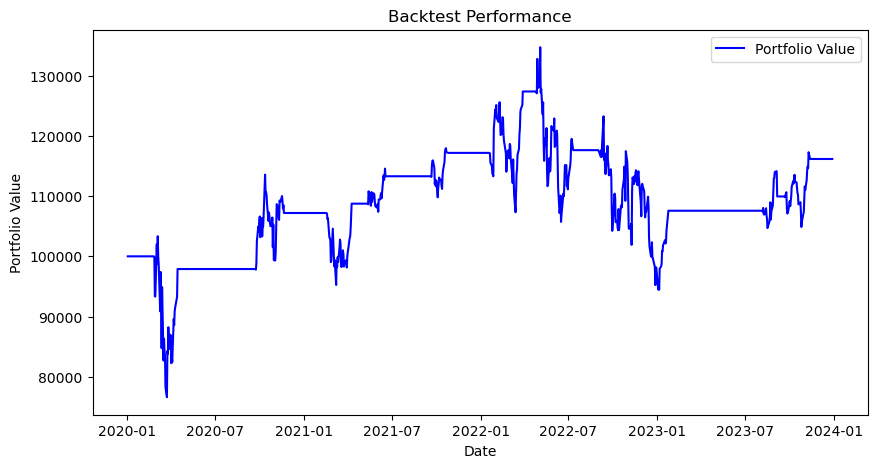

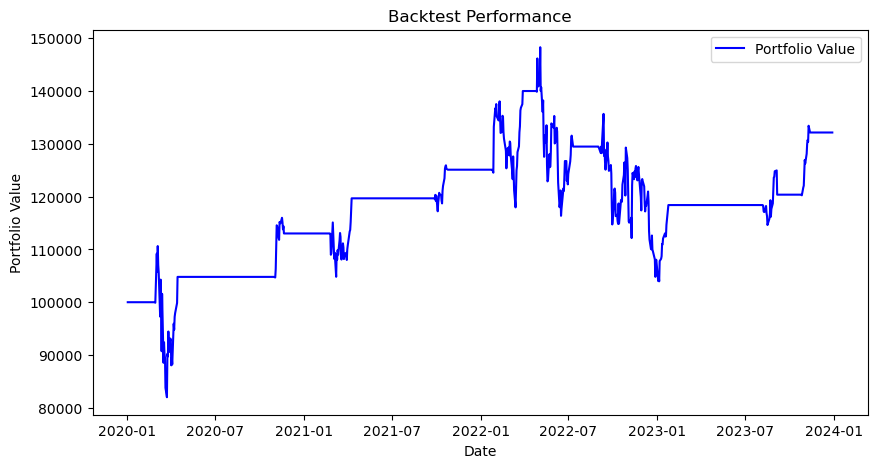

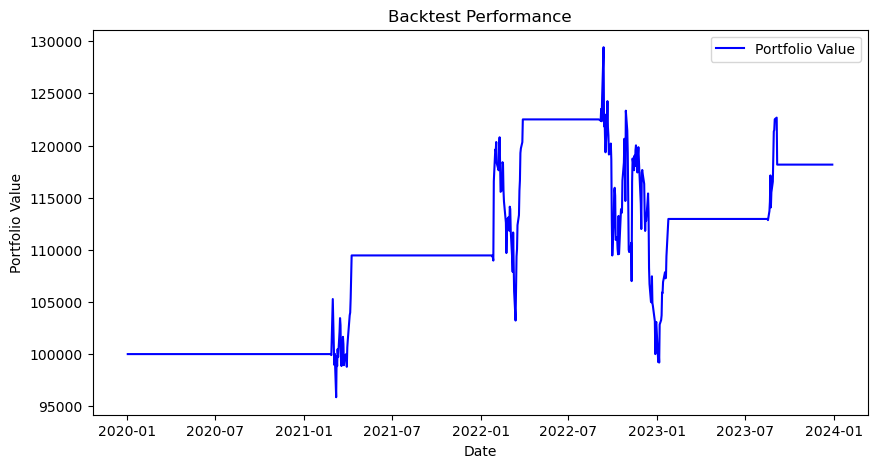

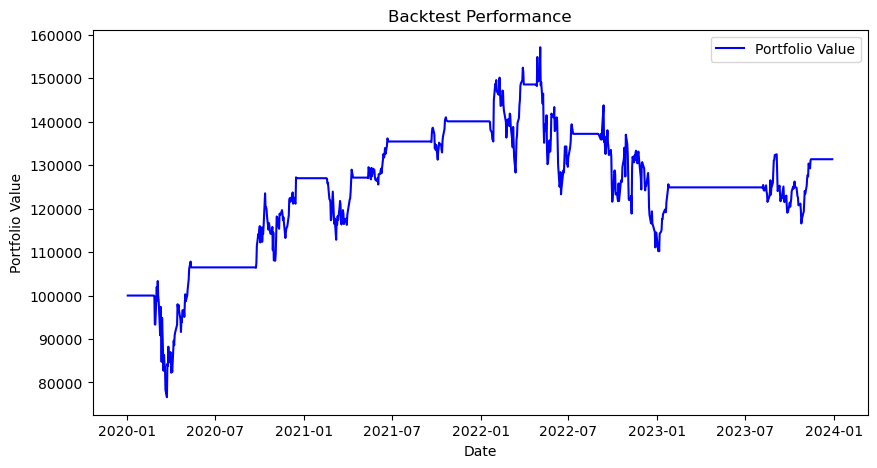

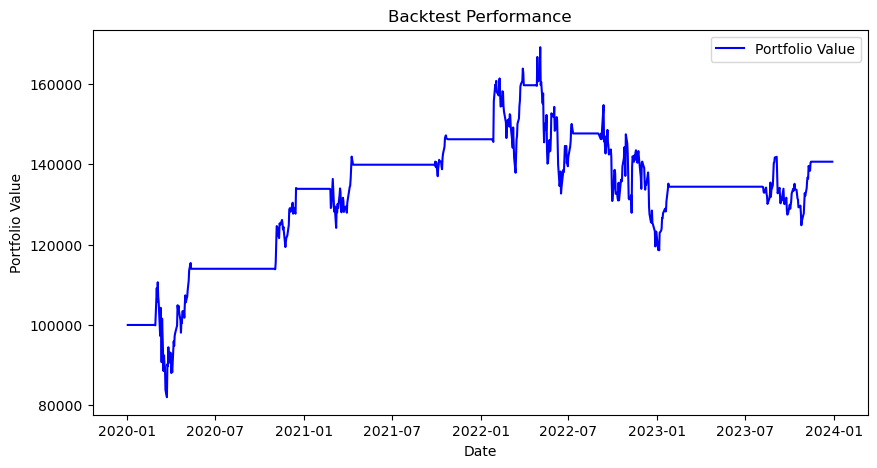

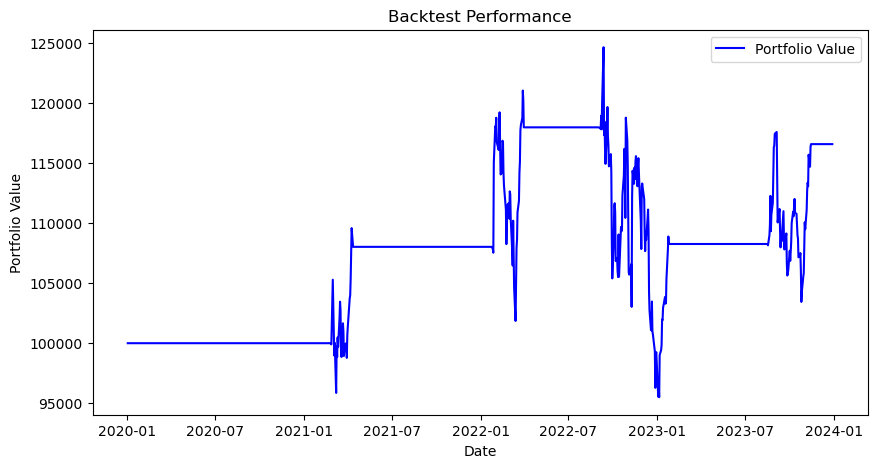

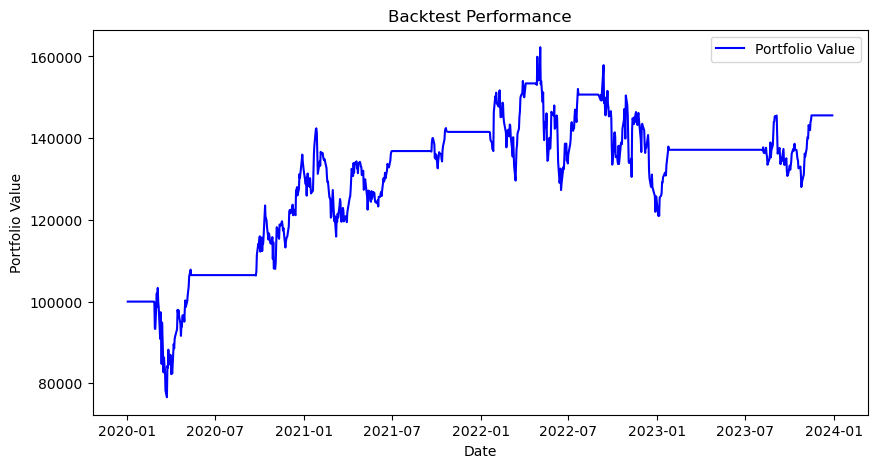

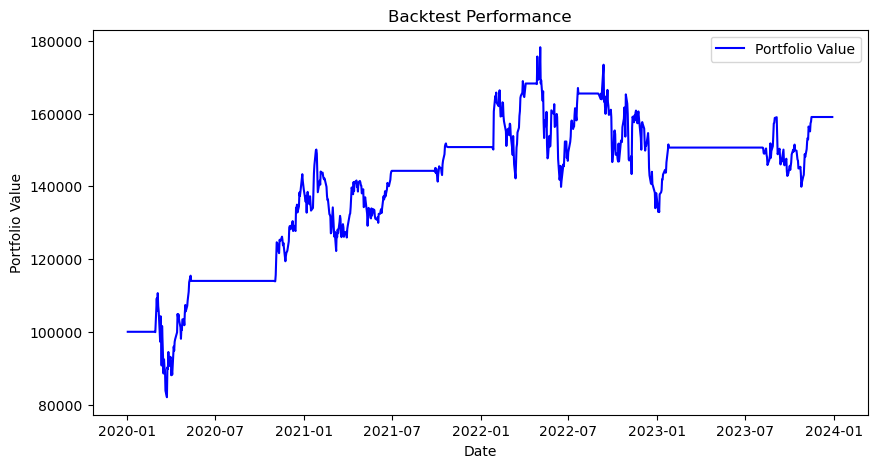

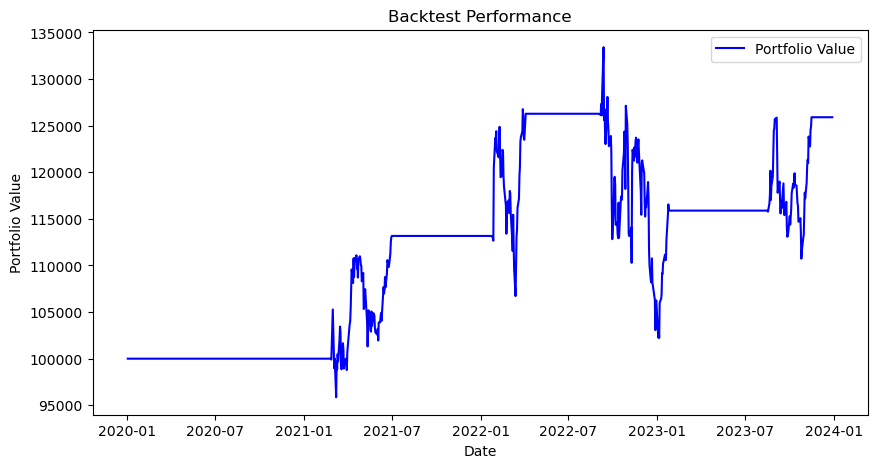

   Overbought  Oversold  Total Return  Max Drawdown  Sharpe Ratio
0          70        30      0.161677     -0.298902      0.274318
1          70        25      0.321389     -0.298932      0.406713
2          70        20      0.181691     -0.233617      0.351745
3          75        30      0.313727     -0.298832      0.388516
4          75        25      0.406529     -0.298911      0.462213
5          75        20      0.165539     -0.233565      0.321837
6          80        30      0.455680     -0.258754      0.476030
7          80        25      0.590636     -0.258728      0.566895
8          80        20      0.258999     -0.233704      0.431312


NameError: name 'plt' is not defined

In [8]:
data_handler = DataHandler(ticker='AAPL', start_date='2020-01-01', end_date='2024-01-01')
data = data_handler.fetch_data()

results_list = []
pnl_trajectories = {}

overbought_values = [70, 75, 80]
oversold_values = [30, 25, 20]

for overbought in overbought_values:
    for oversold in oversold_values:
        my_strategy = MomentumStrategy(period=14, overbought=overbought, oversold=oversold)
        backtest = Backtest(data, my_strategy)
        results = backtest.run()
        pnl_trajectories[f"OB:{overbought} OS:{oversold}"] = results['Final Value']
        results_list.append({
            'Overbought': overbought,
            'Oversold': oversold,
            'Total Return': results['Return'],
            'Max Drawdown': results['Max Drawdown'],
            'Sharpe Ratio': results['Sharpe Ratio']
        })

results_df = pd.DataFrame(results_list)
print(results_df)

plt.figure(figsize=(12, 6))
for label, pnl in pnl_trajectories.items():
    plt.plot(pnl, label=label)

plt.legend()
plt.title('PnL Trajectories for Different RSI Thresholds')
plt.xlabel('Time')
plt.ylabel('Cumulative PnL')
plt.show()
